In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.manifold import TSNE
import gensim.downloader as api
import os
from sklearn.preprocessing import LabelEncoder


In [2]:
import os
file_path = 'C:\\1.Term3\\AML_2034_NLP\\Project\\model_data\\model_data.csv'
print(os.path.exists(file_path))


# Specify the correct file path
file_path = "C:\\1.Term3\\AML_2034_NLP\\Project\\model_data\\model_data.csv"

# Load the dataset
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

# Assuming each line in the text file represents a review
df = pd.DataFrame(data, columns=['text'])

True


In [3]:
df.head()

,text
0,"label,word_tokens,rating,number_of_words\n"
1,"0,""['model', 'ok', 'sedentary', 'type', 'm', '..."
2,"2,""['fast', 'read', 'fill', 'unexpected', 'hum..."
3,"0,""['buy', 'chargersthe', 'instruction', 'ligh..."
4,"0,""['excited', 'find', 'book', 'ostensibly', '..."


In [4]:
column_names = df.columns
print(column_names)


Index(['text'], dtype='object')


In [5]:
df.describe()


,text
count,249391
unique,249348
top,"2,""['little', 'mermaidwa', 'film', 'revitalize..."
freq,3


In [6]:
# Check for missing values
print(df.isnull().sum())

text    0
dtype: int64


In [7]:
# Explore the distribution of review lengths
df['review_length'] = df['text'].apply(len)


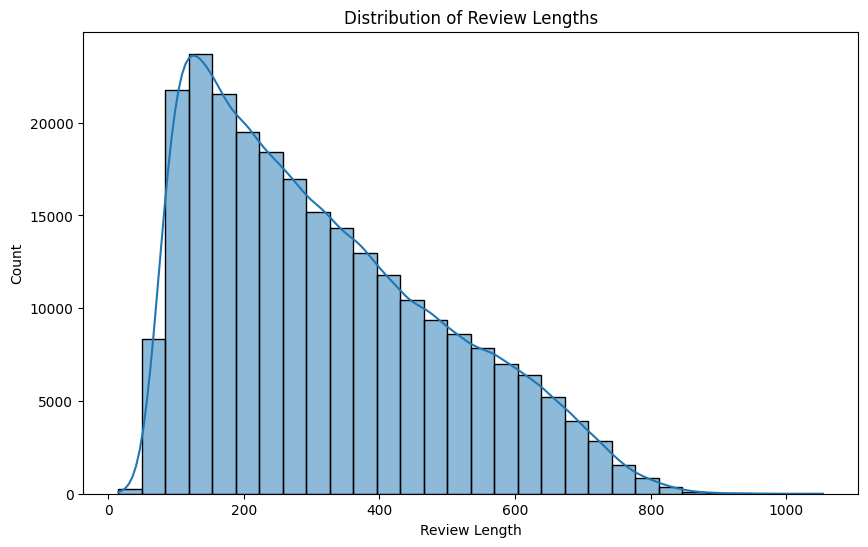

In [8]:
# Histogram of lengths of the reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

In [9]:
# #  Preprocess the text data
# def preprocess_text(text):
#     # Lowercasing
#     text = text.lower()
#     # Remove special characters
#     text = re.sub(r'\W+', ' ', text)
#     # Tokenization
#     tokens = word_tokenize(text)
#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     tokens = [word for word in tokens if word not in stop_words]
#     return tokens

# df['cleaned_text'] = df['text'].apply(preprocess_text)

In [10]:
# from gensim.scripts.glove2word2vec import glove2word2vec
# # from gensim.models import KeyedVectors

# glove_input_file = 'C:\\glove.6B.100d.txt'  # Replace with your path to the GloVe file
# word2vec_output_file = 'glove.6B.100d.word2vec'
# glove2word2vec(glove_input_file, word2vec_output_file)

# glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


In [11]:
# def vectorize_text(tokens, model):
#     word_vectors = [model[word] for word in tokens if word in model]
#     if len(word_vectors) == 0:
#         return np.zeros(model.vector_size)
#     return np.mean(word_vectors, axis=0)

# # Apply the vectorization to the cleaned text
# df['vectorized_text'] = df['cleaned_text'].apply(lambda x: vectorize_text(x, glove_model))


In [12]:


# Check if the file exists
file_path = 'C:\\1.Term3\\AML_2034_NLP\\Project\\model_data\\model_data.csv'
if not os.path.exists(file_path):
    print(f"The file '{file_path}' does not exist.")
else:
    # Specify the path to your GloVe word vectors file
    glove_file = 'C:\\1.Term3\\AML_2034_NLP\\Project\\glove.6B.50d.txt'  # Replace with the actual file path

    # Load GloVe word vectors into a dictionary
    glove_embeddings = {}
    with open(glove_file, 'r', encoding='utf-8') as glove:
        for line in glove:
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_embeddings[word] = vector

    # Load your preprocessed data into a DataFrame
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.readlines()

    # Assuming each line in the text file represents a review
    df = pd.DataFrame(data, columns=['text'])

    # Tokenize and prepare your text data
    df['tokens'] = df['text'].apply(word_tokenize)

    # Function to get the vector representation of a sentence
    def get_sentence_vector(tokens):
        vector_sum = np.zeros(len(next(iter(glove_embeddings.values()))))  # Initialize with zeros
        count = 0
        for word in tokens:
            if word in glove_embeddings:
                vector_sum += glove_embeddings[word]
                count += 1
        if count > 0:
            return vector_sum / count
        else:
            return vector_sum

    # Apply word embedding to each sentence
    df['embedding'] = df['tokens'].apply(get_sentence_vector)

    # Perform dimensionality reduction for visualization (TSNE)
    tsne = TSNE(n_components=2, random_state=42)
    embeddings = np.stack(df['embedding'].to_numpy())
    embedded_data = tsne.fit_transform(embeddings)

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embedded_data[:, 0], embedded_data[:, 1], alpha=0.5)
    plt.title('Word Embedding Visualization (GloVe)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Annotate some points with words for better visualization
    num_words_to_annotate = 10
    for i in range(num_words_to_annotate):
        word = df.iloc[i]['text']
        x, y = embedded_data[i]
        plt.annotate(word, (x, y), alpha=0.7)

    plt.show()

   

